In [6]:
from email_report import *
from models import find_chgpts
import matplotlib.pyplot as plt

In [7]:
# Generate random data
xs = [np.random.randn(np.random.randint(10, 20)) + mean for mean in [10, 14, 8]]
x = np.concatenate(xs)
t = range(len(x))

alpha = 0.005

Text(0, 0.5, 'Values')

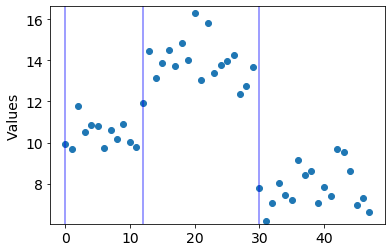

In [8]:
# Test changepoint detector
chgpts, detpts, votes = find_chgpts(x, alpha=alpha, num_test=5)
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(6, 4))

plt.scatter(np.arange(len(x)), x)
# plt.xlim(0, len(x))
plt.ylim(x.min()*.98,x.max()*1.02)
plt.vlines(chgpts, x.min()-1, x.max()+1, color='blue', alpha=.5)
plt.ylabel('Values')

pass, 11, 8, 1.2
warn, 12, 8.2, 1.5
warn, 11, 8.3, 1.5
fail, 10, 8.4, 1.5
pass, 12, 11, 0.85
pass, 13, 11, 0.93
pass, 12, 12, 0.9
pass, 10, 11, 0.95
pass, 10, 11, 0.96
pass, 12, 11, 0.91


(5.170195438890838, 17.302049087761073)

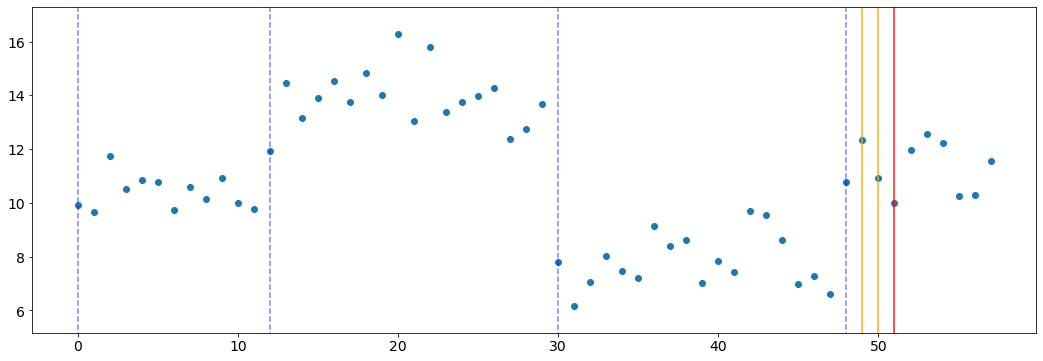

In [9]:
new_mean = 11
y = x
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(18, 6))
for _ in range(10):
    y = np.concatenate((y, np.random.randn(1)+new_mean))
    output = changepoint_test(y, alpha)
    if output[0] == 'warn':
        plt.vlines(len(y)-1, -100, 100, color='orange', alpha=.9)
    if output[0] == 'fail':
        plt.vlines(len(y)-1, -100, 100, color='red', alpha=.9)
    print('%s, %.2g, %.2g, %.2g' % output)
    
plt.scatter(np.arange(len(y)), y)
plt.vlines(chgpts+[len(x)], -100, 100, color='blue', alpha=.5, linestyles='dashed')
plt.ylim(y.min()-1, y.max()+1)